## Reference

[1] [超簡單台股每日爬蟲教學](https://www.finlab.tw/%E8%B6%85%E7%B0%A1%E5%96%AE%E5%8F%B0%E8%82%A1%E6%AF%8F%E6%97%A5%E7%88%AC%E8%9F%B2%E6%95%99%E5%AD%B8/)

***


# How to use "pandas" to calculate the techique index

 - Moving Average (MA, 移動平均)
 - Exponential Moving Average (EMA, 指數移動平均線)
 - MACD
 

In [1]:
# Loading packages

import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

db = sqlite3.connect('TWstock_2')
tsmc = pd.read_sql(con = db, sql = 'SELECT * FROM "2330"')

In [2]:
tsmc.head()

,index,證券名稱,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌(+/-),漲跌價差,最後揭示買價,最後揭示買量,最後揭示賣價,最後揭示賣量,本益比,Date
0,409,台積電,"33,688,187","12,535","8,717,053,470",260.00,260.00,258.00,259.00,-,6.0,259.00,397,259.50,555,19.13,2019-05-06 00:00:00
1,409,台積電,"25,686,126","8,339","6,719,199,455",259.50,263.00,259.00,262.50,+,3.5,262.50,33,263.00,854,19.39,2019-05-07 00:00:00
2,409,台積電,"25,902,364","7,905","6,750,083,504",260.00,261.50,259.50,260.00,-,2.5,260.00,"3,639",260.50,51,19.20,2019-05-08 00:00:00
3,409,台積電,"34,166,574","10,995","8,798,140,796",259.50,259.50,256.00,256.50,-,3.5,256.50,396,257.00,6,18.94,2019-05-09 00:00:00
4,409,台積電,"18,868,212","8,009","4,844,594,484",257.00,259.00,255.00,256.00,-,0.5,256.00,"2,305",256.50,27,18.91,2019-05-10 00:00:00


In [3]:

### Clearning Data


# 需要成交股數、開盤價、最高價、最低價、收盤價的資料
# 使用 Date 當作 index

tsmc.index = pd.to_datetime(tsmc['Date'])
tsmc = tsmc[['成交股數','開盤價','最高價','最低價','收盤價']]
tsmc.columns = ['Volume','Open','High','Low','Close']
tsmc['Close'] = pd.to_numeric(tsmc['Close'])

In [4]:
tsmc.head()

,Volume,Open,High,Low,Close
Date,,,,,
2019-05-06,"33,688,187",260.00,260.00,258.00,259.0
2019-05-07,"25,686,126",259.50,263.00,259.00,262.5
2019-05-08,"25,902,364",260.00,261.50,259.50,260.0
2019-05-09,"34,166,574",259.50,259.50,256.00,256.5
2019-05-10,"18,868,212",257.00,259.00,255.00,256.0


## 移動平均線

 - 移動平均線 (Moving Average) 是我們最常運用的技術指標
 
 
 - 當我們畫出均線後，我們就可以比較目前價格與均價之間的關係
 
 
 - 其 n 天移動平均線的計算公式為 $$MA = \frac{(C_1 + \cdots C_n)}{n}$$ 
 
 
 - 為 n 天的收盤價的平均。
 
#### 我們如何利用 pandas 來計算移動平均線勒？


 - 可利用 DataFrame 下面的 rolling 方法，就能計算出移動平均線

In [6]:
# 分別計算 7天 , 15天 與 30天 的移動平均線
tsmc['MA_7'] = tsmc['Close'].rolling(7).mean()
tsmc['MA_15'] = tsmc['Close'].rolling(15).mean()
tsmc['MA_30'] = tsmc['Close'].rolling(30).mean()

In [7]:
tsmc.head()

,Volume,Open,High,Low,Close,MA_7,MA_15,MA_30
Date,,,,,,,,
2019-05-06,"33,688,187",260.00,260.00,258.00,259.0,NaN,NaN,NaN
2019-05-07,"25,686,126",259.50,263.00,259.00,262.5,NaN,NaN,NaN
2019-05-08,"25,902,364",260.00,261.50,259.50,260.0,NaN,NaN,NaN
2019-05-09,"34,166,574",259.50,259.50,256.00,256.5,NaN,NaN,NaN
2019-05-10,"18,868,212",257.00,259.00,255.00,256.0,NaN,NaN,NaN


## 指數移動平均線

 - 當我們要比較均價的趨勢快慢時，我們可以利用指數移動平均數(EMA)


 - 計算公式為 $$EMA_{today} = \alpha \times Price_{today} + (1-\alpha) \times EMA_{yesterday}$$ 
 
 
 - 其中  $$\alpha = \frac{2}{n+1}$$
 
 
 - 由於我們需要初始值來計算 EMA
 
 
 - 我們可以直接取第一天的收盤價 (Close) 當做 $EMA_1$ 
 
 
 - 而在 DataFrame 下面，我們也有對應的方法 **ewm** 來計算指數移動平均線

In [8]:
tsmc['EMA_12'] = tsmc['Close'].ewm(span=12).mean()
tsmc['EMA_26'] = tsmc['Close'].ewm(span=26).mean()

In [9]:
tsmc.tail()

,Volume,Open,High,Low,Close,MA_7,MA_15,MA_30,EMA_12,EMA_26
Date,,,,,,,,,,
2019-06-28,"28,085,212",241.50,241.50,238.00,239.0,241.000000,240.400000,237.200000,239.530646,239.406148
2019-07-01,"66,370,875",245.50,250.00,245.00,248.5,241.500000,240.966667,237.433333,240.912278,240.112270
2019-07-01,"66,370,875",245.50,250.00,245.00,248.5,241.500000,241.233333,237.783333,242.080859,240.761244
2019-07-02,"26,832,202",249.50,250.00,247.50,249.0,242.642857,241.433333,238.283333,243.146298,241.396595
2019-07-03,"29,549,774",244.00,245.00,242.00,242.5,243.214286,241.600000,238.433333,243.046792,241.481429


## MACD
 - 根據維基百科: 是股票交易中一種常見的技術分析工具，由Gerald Appel於1970年代提出，用於研判股票價格變化的強度、方向、能量，以及趨勢周期，以便把握股票買進和賣出的時機。
 
 - MACD指標由一組曲線與圖形組成，通過收盤時股價或指數的快變及慢變的指數移動平均值（EMA）之間的差計算出來。
 
 - 「快」指更短時段的EMA，而「慢」則指較長時段的 EMA，最常用的是 12 及 26 日 EMA。 
 
 
#### 其計算公式為

$$ DIF = EMA_{(close,12)} - EMA_{(close,26)}$$


$$ DEM = EMA(DIF,9) $$


$$ OSC = DIF - DEM $$

In [10]:
tsmc['DIF'] = tsmc['EMA_12'] - tsmc['EMA_26']
tsmc['DEM'] = tsmc['DIF'].ewm(span=9).mean()
tsmc['OSC'] = tsmc['DIF'] - tsmc['DEM']

In [15]:
from_date = '2019-06-17'
tsmc_2 = tsmc[from_date:]

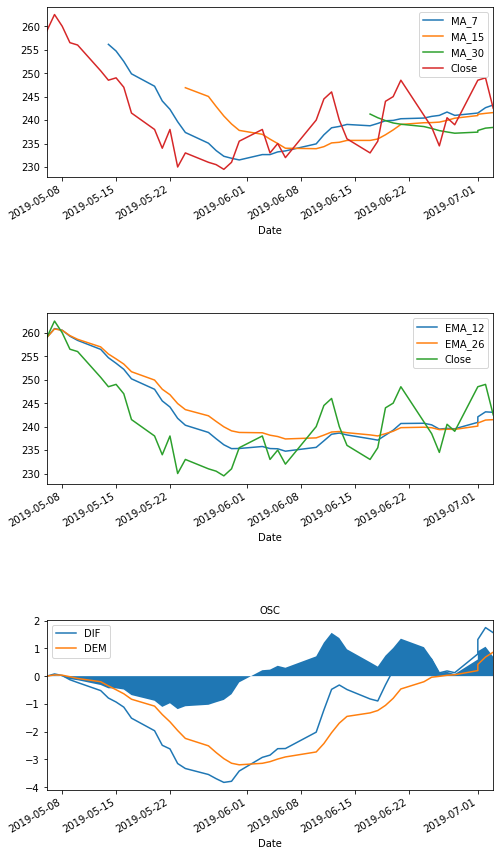

In [37]:
# Graphing

fig,ax = plt.subplots(3,1,figsize=(8,16))
plt.subplots_adjust(hspace = 0.8)

# MA
tsmc['MA_7'].plot(ax=ax[0])
tsmc['MA_15'].plot(ax=ax[0])
tsmc['MA_30'].plot(ax=ax[0])
tsmc['Close'].plot(ax=ax[0])
ax[0].legend()
plt.title('MA',fontsize=10)

# EMA
tsmc['EMA_12'].plot(ax=ax[1])
tsmc['EMA_26'].plot(ax=ax[1])
tsmc['Close'].plot(ax=ax[1])
ax[1].legend()
plt.title('EMA',fontsize=10)

# OSC
tsmc['DIF'].plot(ax=ax[2])
tsmc['DEM'].plot(ax=ax[2])
ax[2].fill_between(tsmc.index,0,tsmc['OSC'])
ax[2].legend()
plt.title('OSC',fontsize=10)


plt.show()